# Overview 

#### Evaluation
#### Goal
Predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from math import sqrt
import tensorflow_decision_forests as tfdf
import lightgbm as lgb
import scipy.stats as st


2024-02-11 23:15:53.551198: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 23:15:53.551331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 23:15:53.698378: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv',sep=',')
dataset_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv',sep=',')

In [4]:
dataset_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
dataset_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# 1 Cleaning data


In [6]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# print average missing values by variable
dataset_train.isna().mean()


Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [8]:
mask = dataset_train.isna().mean() < 0.5
dataset_train.loc[:,mask[mask.values == 0].index].columns

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
cols = mask[mask].index
df_train = dataset_train.loc[:,cols]
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


<Axes: >

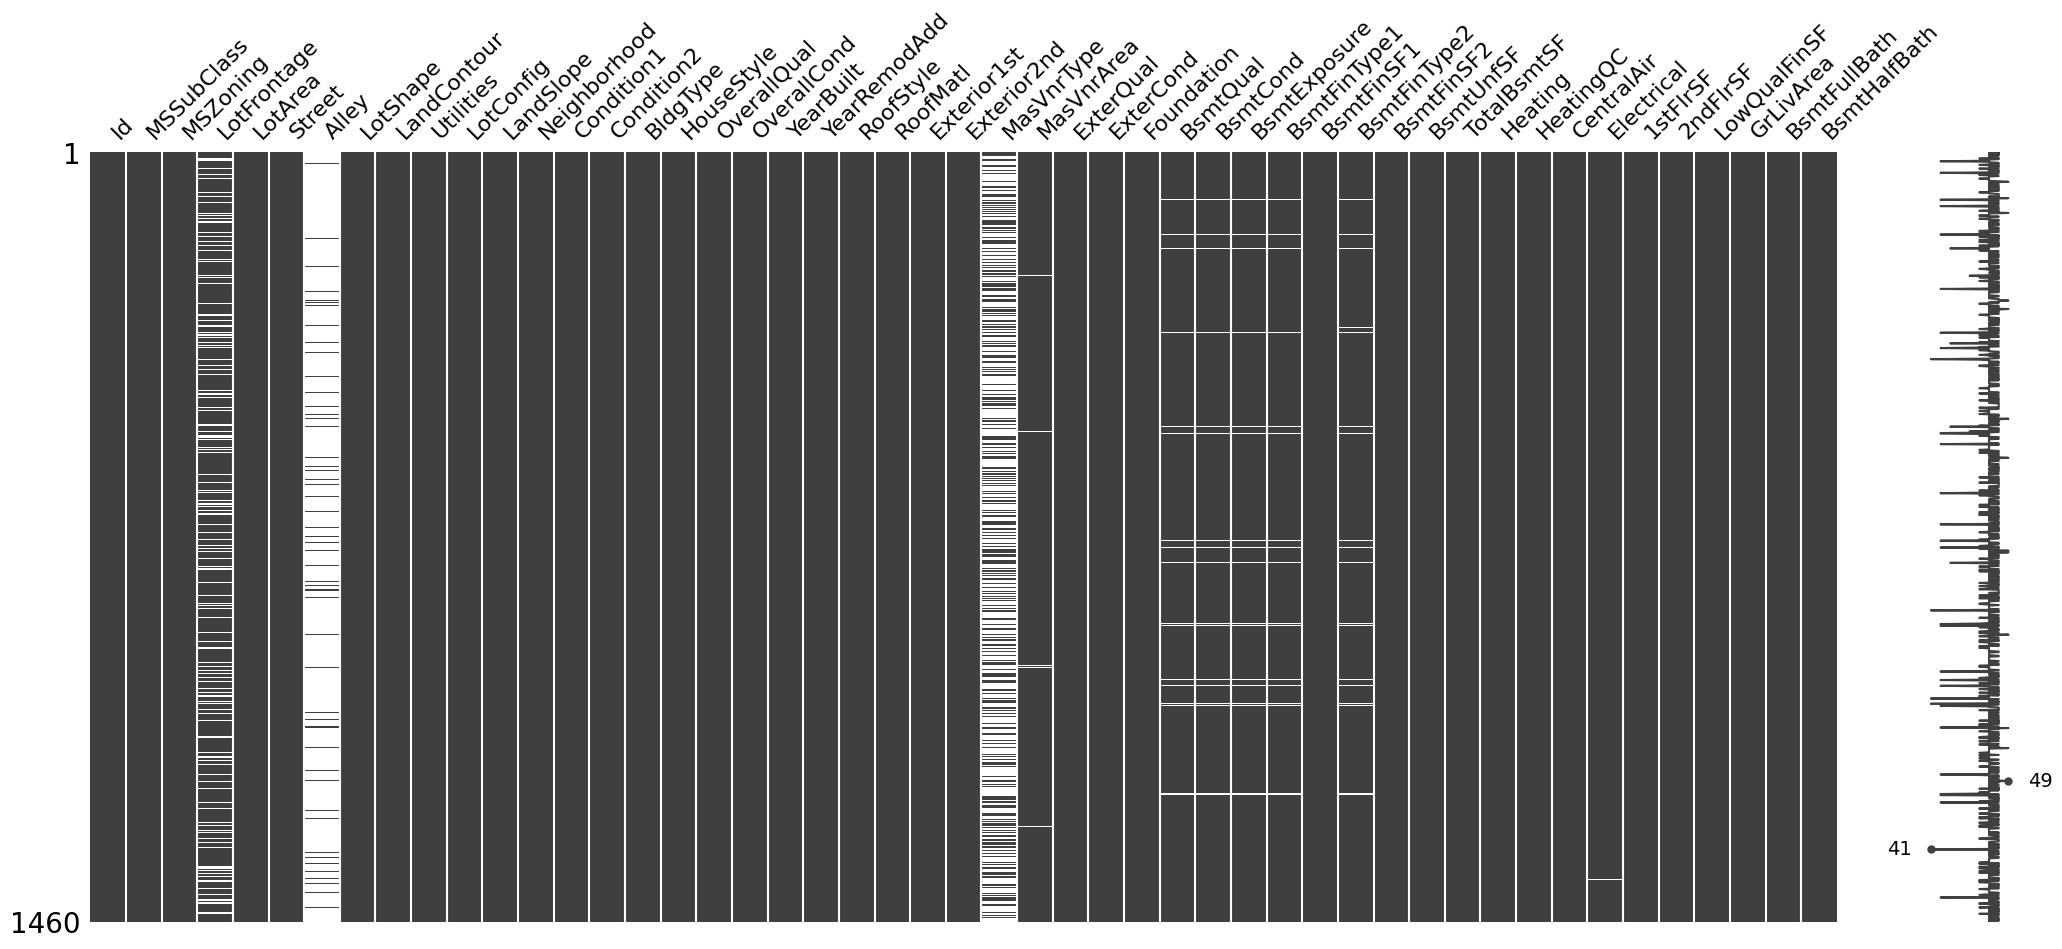

In [10]:
msno.matrix(dataset_train.iloc[:,:49])

<Axes: >

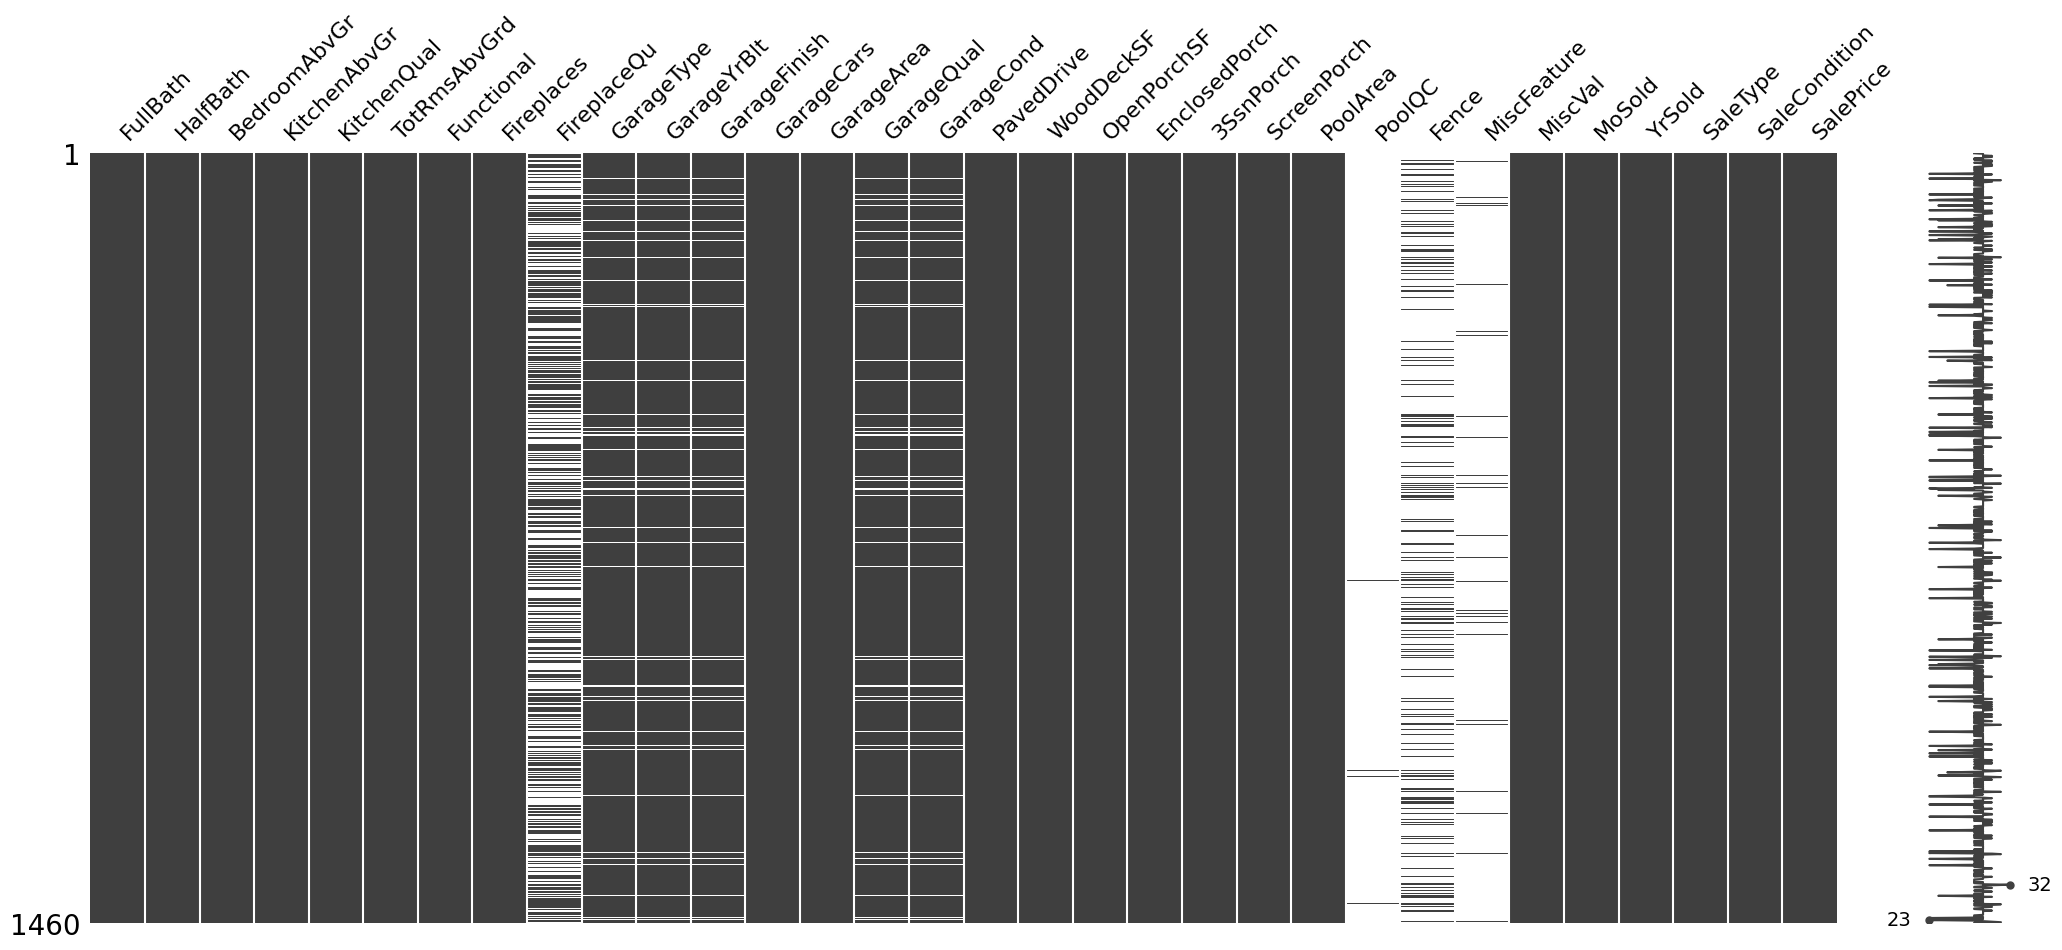

In [11]:
msno.matrix(dataset_train.iloc[:,49:])

### 1.1 Delete variables with missing value

I remove variables with a missing value greater than 0.5 : 

- Alley
- MasVnrType
- PoolQC
- Fence
- MiscFeature

In [12]:
cols_drop = ['FireplaceQu','LotFrontage']
#df_train = df_train.loc[:,~df_train.columns.isin(cols_drop)]
#df_train = df_train.dropna()
df_train.isna().mean().sort_values(ascending=False)

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
                  ...   
BsmtUnfSF       0.000000
TotalBsmtSF     0.000000
Heating         0.000000
MSSubClass      0.000000
SalePrice       0.000000
Length: 76, dtype: float64


# 2 Data Exploration

- 2.1 Encode categorial variables
- 2.2 Deleting the variable with low variance 
- 2.3 Outliers
- 2.4 Bivaries analyses 
- 2.5 Variables correlation with target 




In [13]:
df_train.drop(columns='Id', inplace=True)

In [14]:
cols_categorial = df_train.select_dtypes(exclude=np.number).columns
cols_not_categorial = df_train.select_dtypes(include=np.number).columns

## 2.1 Encode categorial variables

In [15]:
def encode_variable(colonne, df = object):
    le = LabelEncoder()
    for col in colonne:
        df[col] = le.fit_transform(df[col])
    return df

In [16]:
df_train = encode_variable(cols_categorial, df_train)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [17]:
df_train.select_dtypes(include=np.number)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [18]:
df_train.loc[:,['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'SalePrice']]


,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,1710,856,854,0,706,0,150,856,208500
1,1262,1262,0,0,978,0,284,1262,181500
2,1786,920,866,0,486,0,434,920,223500
3,1717,961,756,0,216,0,540,756,140000
4,2198,1145,1053,0,655,0,490,1145,250000
...,...,...,...,...,...,...,...,...,...
1455,1647,953,694,0,0,0,953,953,175000
1456,2073,2073,0,0,790,163,589,1542,210000
1457,2340,1188,1152,0,275,0,877,1152,266500
1458,1078,1078,0,0,49,1029,0,1078,142125


In [19]:
df_train.loc[df_train['1stFlrSF'] != df_train.TotalBsmtSF, ['GrLivArea','1stFlrSF','2ndFlrSF','LowQualFinSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'SalePrice']]

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
3,1717,961,756,0,216,0,540,756,140000
6,1694,1694,0,0,1369,0,317,1686,307000
8,1774,1022,752,0,0,0,952,952,129900
9,1077,1077,0,0,851,0,140,991,118000
11,2324,1182,1142,0,998,0,177,1175,345000
...,...,...,...,...,...,...,...,...,...
1448,1346,796,550,0,0,0,560,560,112000
1451,1578,1578,0,0,0,0,1573,1573,287090
1452,1072,1072,0,0,547,0,0,547,145000
1456,2073,2073,0,0,790,163,589,1542,210000


In [20]:
df_train.drop(columns=['1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


### Redundant variables

- TotalBsmtSF (Total square feet of basement area) = BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF
- GrLivArea (Above grade (ground) living area square feet) = 1stFlrSF + 2ndFlrSF


## 2.2 Deleting the variable with low variance

In [21]:
# Removed features with a low variance

def threshold_variance(data):

    df = pd.DataFrame(data)

    X = df.values

    your_threshold = 0.1

    selector = VarianceThreshold(threshold=your_threshold)

    X_high_variance = selector.fit_transform(X)

    mask = selector.get_support()
    
    selected_features = df.columns[mask]
    print("Selected features:", selected_features)

    removed_features = df.columns[~mask]
    print("Removed features:", removed_features)


    return selected_features

selected_features = threshold_variance(df_train)

Selected features: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'HeatingQC', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')
Remo

In [22]:
df_train = df_train.loc[:,selected_features]
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,3,3,4,5,2,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,3,3,2,24,1,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,0,3,4,5,2,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,0,3,0,6,2,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,0,3,2,15,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,3,3,4,8,2,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,3,3,4,14,2,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,3,3,4,6,2,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,3,3,4,12,2,0,...,112,0,0,0,0,4,2010,8,4,142125


/tmp/ipykernel_34/2057917143.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], kde=False, fit=st.johnsonsu)
/tmp/ipykernel_34/2057917143.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], kde=False, fit=st.norm)


<Axes: title={'center': 'Normal'}, xlabel='SalePrice'>

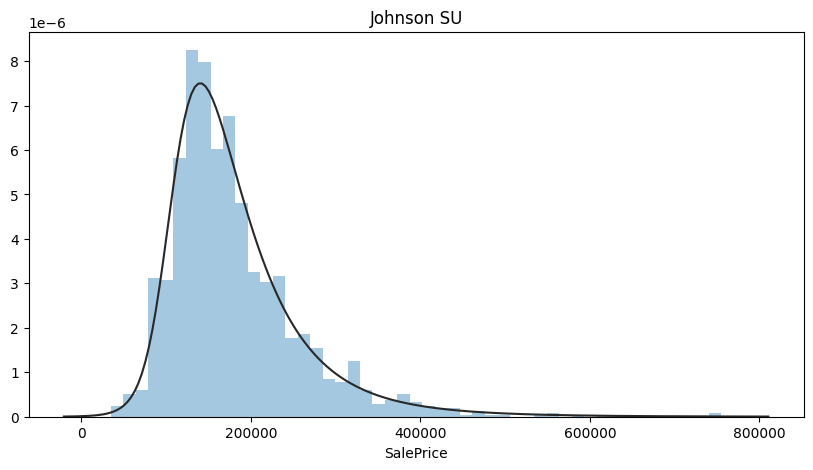

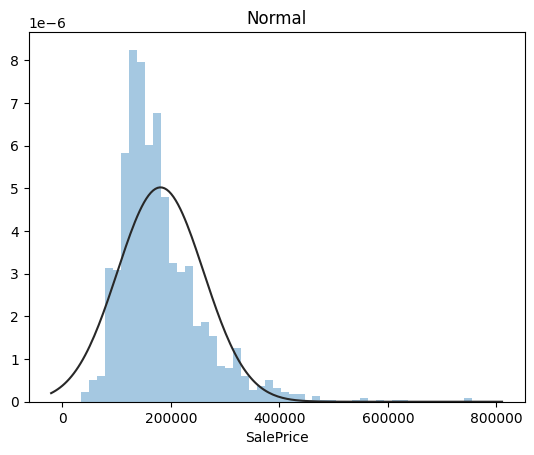

In [23]:
# Target Vizualization 

fig, ax = plt.subplots(figsize = (10,5))
#sns.histplot(df_train['SalePrice'],  bins=100)
plt.figure(1); plt.title('Johnson SU')
sns.distplot(df_train['SalePrice'], kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(df_train['SalePrice'], kde=False, fit=st.norm)

- Apparantly the sale price follow a Johnson SU distribution

In [24]:
cols_categorial = cols_categorial[~cols_categorial.isin(['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir',
                                                         'BsmtHalfBath', 'KitchenAbvGr','1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])]
cols_categorial

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
cols_not_categorial = cols_not_categorial[~cols_not_categorial.isin(['Street', 'Utilities', 'LandSlope', 'Condition2', 'Heating', 'CentralAir',
                                                                     'BsmtHalfBath', 'KitchenAbvGr','1stFlrSF','2ndFlrSF','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'])]
cols_not_categorial

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
f = pd.melt(df_train,value_vars=cols_not_categorial )
f

,variable,value
0,MSSubClass,60.0
1,MSSubClass,20.0
2,MSSubClass,60.0
3,MSSubClass,70.0
4,MSSubClass,60.0
...,...,...
43795,SalePrice,175000.0
43796,SalePrice,210000.0
43797,SalePrice,266500.0
43798,SalePrice,142125.0


In [27]:
f = f.fillna(0)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

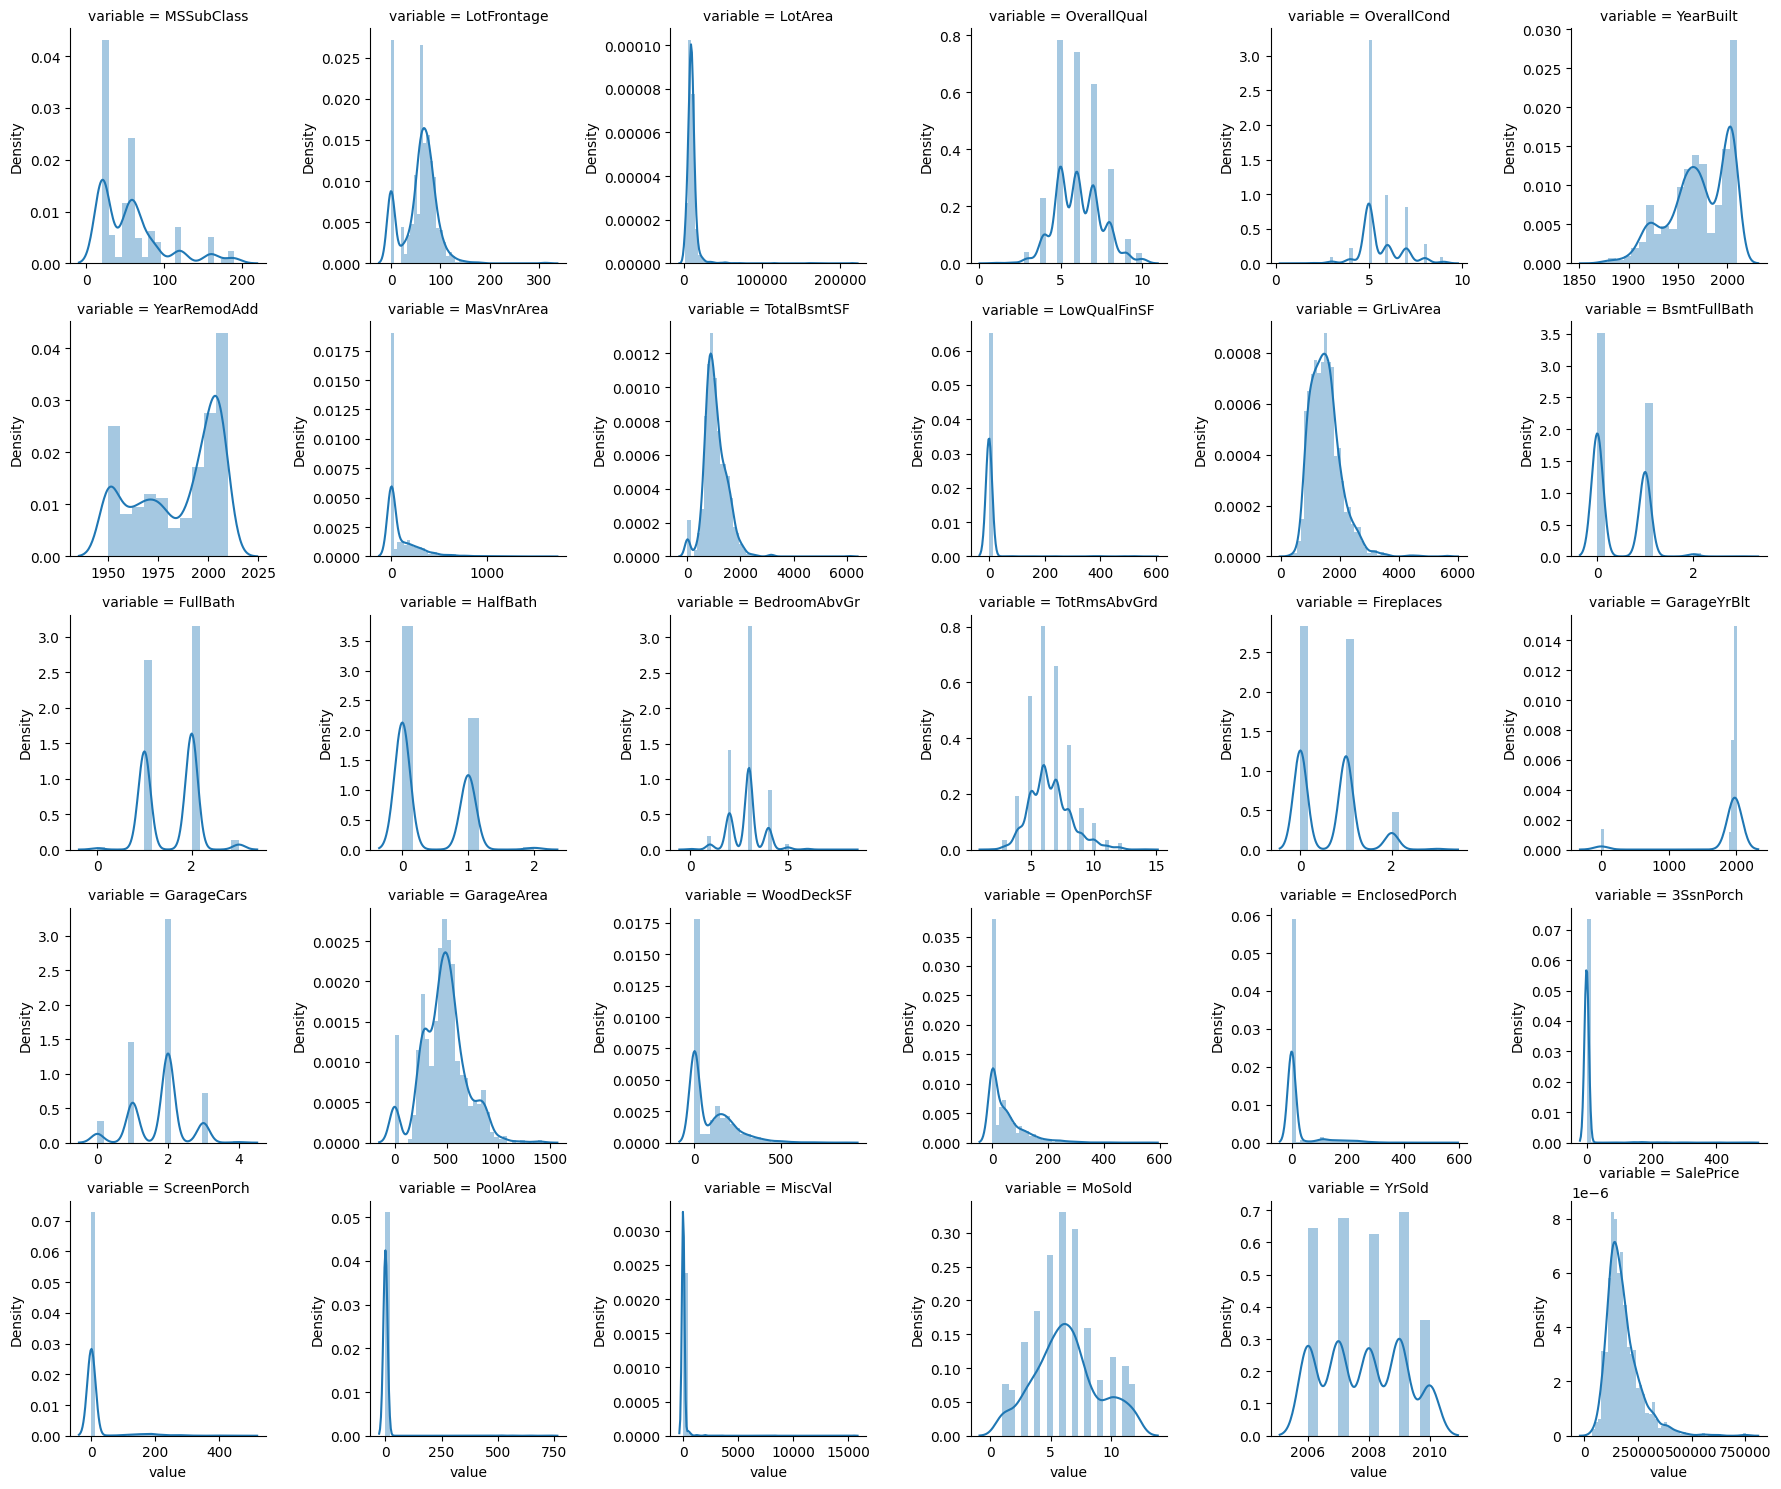

In [28]:
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False)
g.map(sns.distplot,'value')

In [29]:
df_train[cols_not_categorial].apply(lambda x : st.shapiro(x.fillna(0))[1] < 0.01)

MSSubClass       True
LotFrontage      True
LotArea          True
OverallQual      True
OverallCond      True
YearBuilt        True
YearRemodAdd     True
MasVnrArea       True
TotalBsmtSF      True
LowQualFinSF     True
GrLivArea        True
BsmtFullBath     True
FullBath         True
HalfBath         True
BedroomAbvGr     True
TotRmsAbvGrd     True
Fireplaces       True
GarageYrBlt      True
GarageCars       True
GarageArea       True
WoodDeckSF       True
OpenPorchSF      True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
MoSold           True
YrSold           True
SalePrice        True
dtype: bool

No variables follow a normal distribution

### 2.3 Searching for outliers

In [30]:
df_train.iloc[:,:20].describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,56.897260,3.028767,70.049958,10516.828082,1.942466,2.777397,3.019178,12.251370,2.031507,0.493151,3.038356,6.099315,5.575342,1971.267808,1984.865753,1.410274,1.075342,9.624658,10.339726,103.685262
std,42.300571,0.632017,24.284752,9981.264932,1.409156,0.707666,1.622634,6.013735,0.868515,1.198277,1.911305,1.382997,1.112799,30.202904,20.645407,0.834998,0.599127,3.197659,3.540570,181.066207
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,3.000000,59.000000,7553.500000,0.000000,3.000000,2.000000,7.000000,2.000000,0.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,1.000000,1.000000,8.000000,8.000000,0.000000
50%,50.000000,3.000000,69.000000,9478.500000,3.000000,3.000000,4.000000,12.000000,2.000000,0.000000,2.000000,6.000000,5.000000,1973.000000,1994.000000,1.000000,1.000000,12.000000,13.000000,0.000000
75%,70.000000,3.000000,80.000000,11601.500000,3.000000,3.000000,4.000000,17.000000,2.000000,0.000000,5.000000,7.000000,6.000000,2000.000000,2004.000000,1.000000,1.000000,12.000000,13.000000,166.000000
max,190.000000,4.000000,313.000000,215245.000000,3.000000,3.000000,4.000000,24.000000,8.000000,4.000000,7.000000,10.000000,9.000000,2010.000000,2010.000000,5.000000,7.000000,14.000000,15.000000,1600.000000


In [31]:
df_train.iloc[:,20:40].describe()

,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,HeatingQC,Electrical,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.539726,3.733562,1.396575,2.305479,2.842466,2.310274,2.815068,4.741781,1057.429452,1.538356,3.682877,5.844521,1515.463699,0.425342,1.565068,0.382877,2.866438,2.339726,6.517808,5.749315
std,0.693995,0.731807,0.722394,0.899225,0.676527,1.165663,1.874410,0.946713,438.705324,1.739524,1.051834,48.623081,525.480383,0.518911,0.550916,0.502885,0.815778,0.830161,1.625393,0.979659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.000000,4.000000,1.000000,2.000000,3.000000,2.000000,1.000000,5.000000,795.750000,0.000000,4.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,2.000000,5.000000,6.000000
50%,3.000000,4.000000,1.000000,2.000000,3.000000,3.000000,2.000000,5.000000,991.500000,0.000000,4.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,3.000000,6.000000,6.000000
75%,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,5.000000,5.000000,1298.250000,4.000000,4.000000,0.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,3.000000,7.000000,6.000000
max,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,6.000000,6.000000,6110.000000,4.000000,5.000000,572.000000,5642.000000,3.000000,3.000000,2.000000,8.000000,3.000000,14.000000,6.000000


In [32]:
df_train.iloc[:,40:60].describe()

,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType
count,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.613014,3.804795,2.485616,1978.506164,1.284247,1.767123,472.980137,3.927397,3.960959,1.856164,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014
std,0.644666,1.398954,1.933206,24.689725,0.892831,0.747315,213.804841,0.647822,0.566832,0.496592,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100
min,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,0.000000,2.000000,1.000000,1961.000000,1.000000,1.000000,334.500000,4.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000
50%,1.000000,4.000000,1.000000,1980.000000,1.000000,2.000000,480.000000,4.000000,4.000000,2.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000
75%,1.000000,5.000000,5.000000,2002.000000,2.000000,2.000000,576.000000,4.000000,4.000000,2.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000
max,3.000000,5.000000,6.000000,2010.000000,3.000000,4.000000,1418.000000,5.000000,5.000000,2.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000


In [33]:
df_train.loc[df_train.LotArea >100000,['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
249,2144,277000
313,2036,375000
335,1786,228950
706,1824,302000


In [34]:
df_train.loc[df_train.TotalBsmtSF > 3000]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,20,3,85.0,10655,0,3,4,16,2,0,...,0,0,0,0,0,10,2009,8,4,284000
440,20,3,105.0,15431,3,3,4,16,2,0,...,0,0,170,0,0,4,2009,8,4,555000
496,20,3,NaN,12692,0,3,4,15,2,0,...,291,0,0,0,0,5,2007,8,4,430000
523,60,3,130.0,40094,0,0,4,7,4,0,...,0,0,0,0,0,10,2007,6,5,184750
1298,60,3,313.0,63887,2,0,0,7,1,0,...,0,0,0,480,0,1,2008,6,5,160000


In [35]:
# filtering outliers 
df_train.loc[:,['MasVnrArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','LotArea','TotalBsmtSF']].describe()

,MasVnrArea,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,LotArea,TotalBsmtSF
count,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,103.685262,46.660274,21.954110,3.409589,15.060959,2.758904,10516.828082,1057.429452
std,181.066207,66.256028,61.119149,29.317331,55.757415,40.177307,9981.264932,438.705324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7553.500000,795.750000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,9478.500000,991.500000
75%,166.000000,68.000000,0.000000,0.000000,0.000000,0.000000,11601.500000,1298.250000
max,1600.000000,547.000000,552.000000,508.000000,480.000000,738.000000,215245.000000,6110.000000


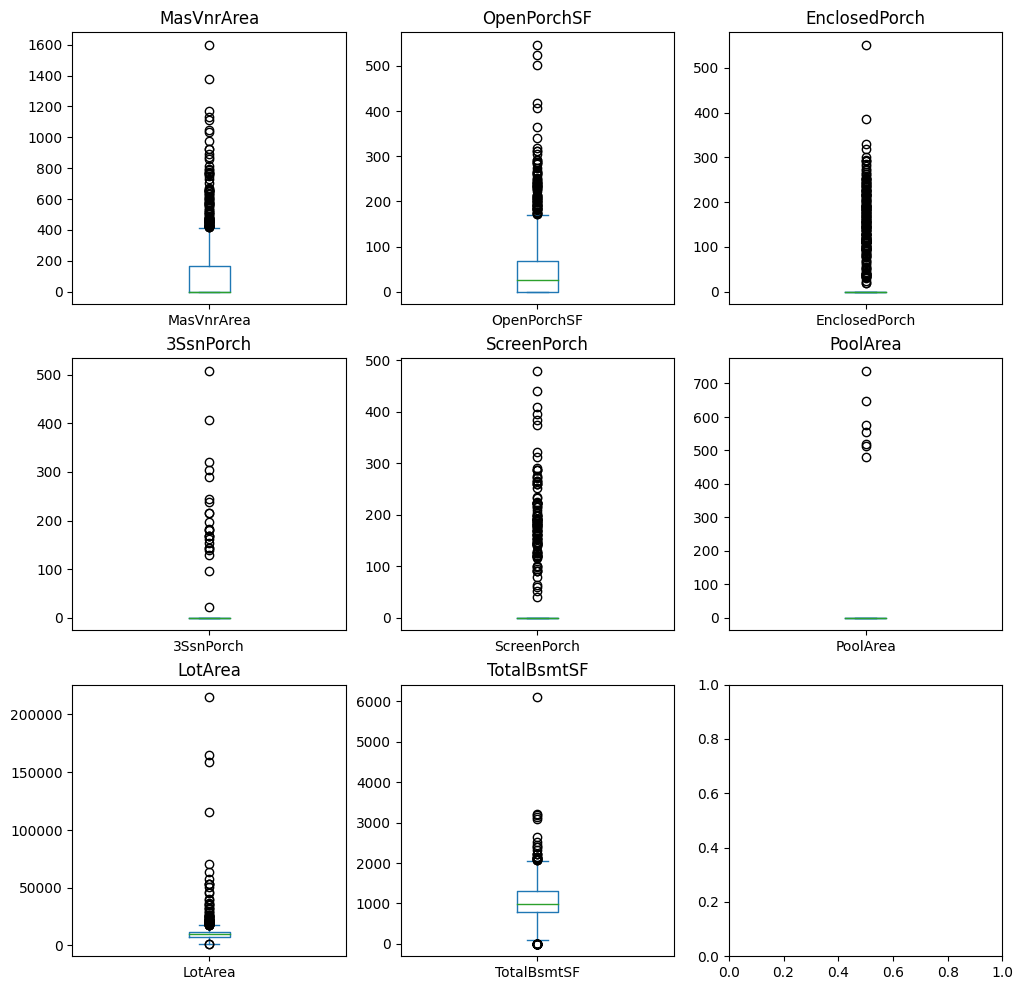

In [36]:
columns_to_plot = ['MasVnrArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','LotArea','TotalBsmtSF']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    df_train[col].plot.box(ax=axs[i])
    axs[i].set_title(col)

##### About outliers (extremes and aberrants values) observations
- The values of LotArea variable are between 1300 and 11000 and some values are greater at 11 000 feet square. 
- The values of MasVnrArea (Masonry veneer area in square feet) variable are between 0 and 400 and some values are greater than 400.
- The values of OpenPorchSF variable is egal 0 and some values are greater at 70 feet square. 
- In the majority the values of EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea variables are between 0 and 10 and some values are greater at 10 feet square. 
- The values of TotalBsmtSF variable are between 105 and 1024 and some values are greater at 1024 feet square. 




## 2.4 Bivariete analysis

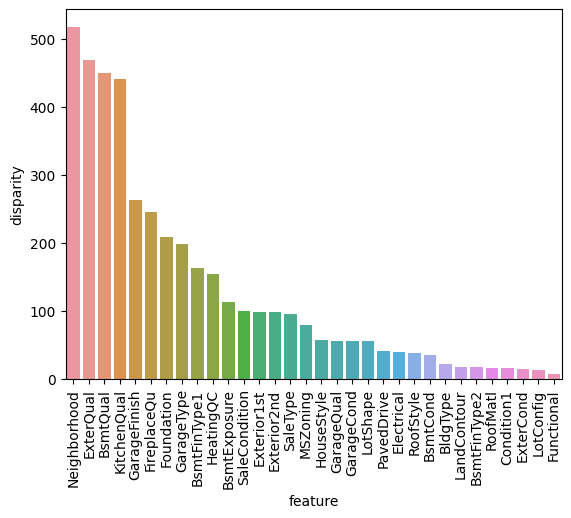

In [37]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cols_categorial
    pvals = []
    for c in cols_categorial:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(df_train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

Some categorial variables influence the  target (Neighborhood,ExterQual,BsmetQual) 

In [38]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF',
       'HeatingQC', 'Electrical', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [39]:
df_train.loc[:,cols_categorial]

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,RoofMatl,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,3,3,4,5,2,0,5,1,1,...,2,6,5,1,1,4,4,2,8,4
1,3,3,3,2,24,1,0,2,1,1,...,3,6,4,1,1,4,4,2,8,4
2,3,0,3,4,5,2,0,5,1,1,...,2,6,4,1,1,4,4,2,8,4
3,3,0,3,0,6,2,0,5,1,1,...,2,6,2,5,2,4,4,2,8,0
4,3,0,3,2,15,2,0,5,1,1,...,2,6,4,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,3,4,8,2,0,5,1,1,...,3,6,4,1,1,4,4,2,8,4
1456,3,3,3,4,14,2,0,2,1,1,...,3,2,4,1,2,4,4,2,8,4
1457,3,3,3,4,6,2,0,5,1,1,...,2,6,2,1,1,4,4,2,8,4
1458,3,3,3,4,12,2,0,2,3,1,...,2,6,5,1,2,4,4,2,8,4


In [40]:
cols = list(cols_categorial)
cols.append('SalePrice')

In [41]:
f = pd.melt(dataset_train[cols], id_vars = ['SalePrice'] ,value_vars = cols_categorial)
f

,SalePrice,variable,value
0,208500,MSZoning,RL
1,181500,MSZoning,RL
2,223500,MSZoning,RL
3,140000,MSZoning,RL
4,250000,MSZoning,RL
...,...,...,...
46715,175000,SaleCondition,Normal
46716,210000,SaleCondition,Normal
46717,266500,SaleCondition,Normal
46718,142125,SaleCondition,Normal


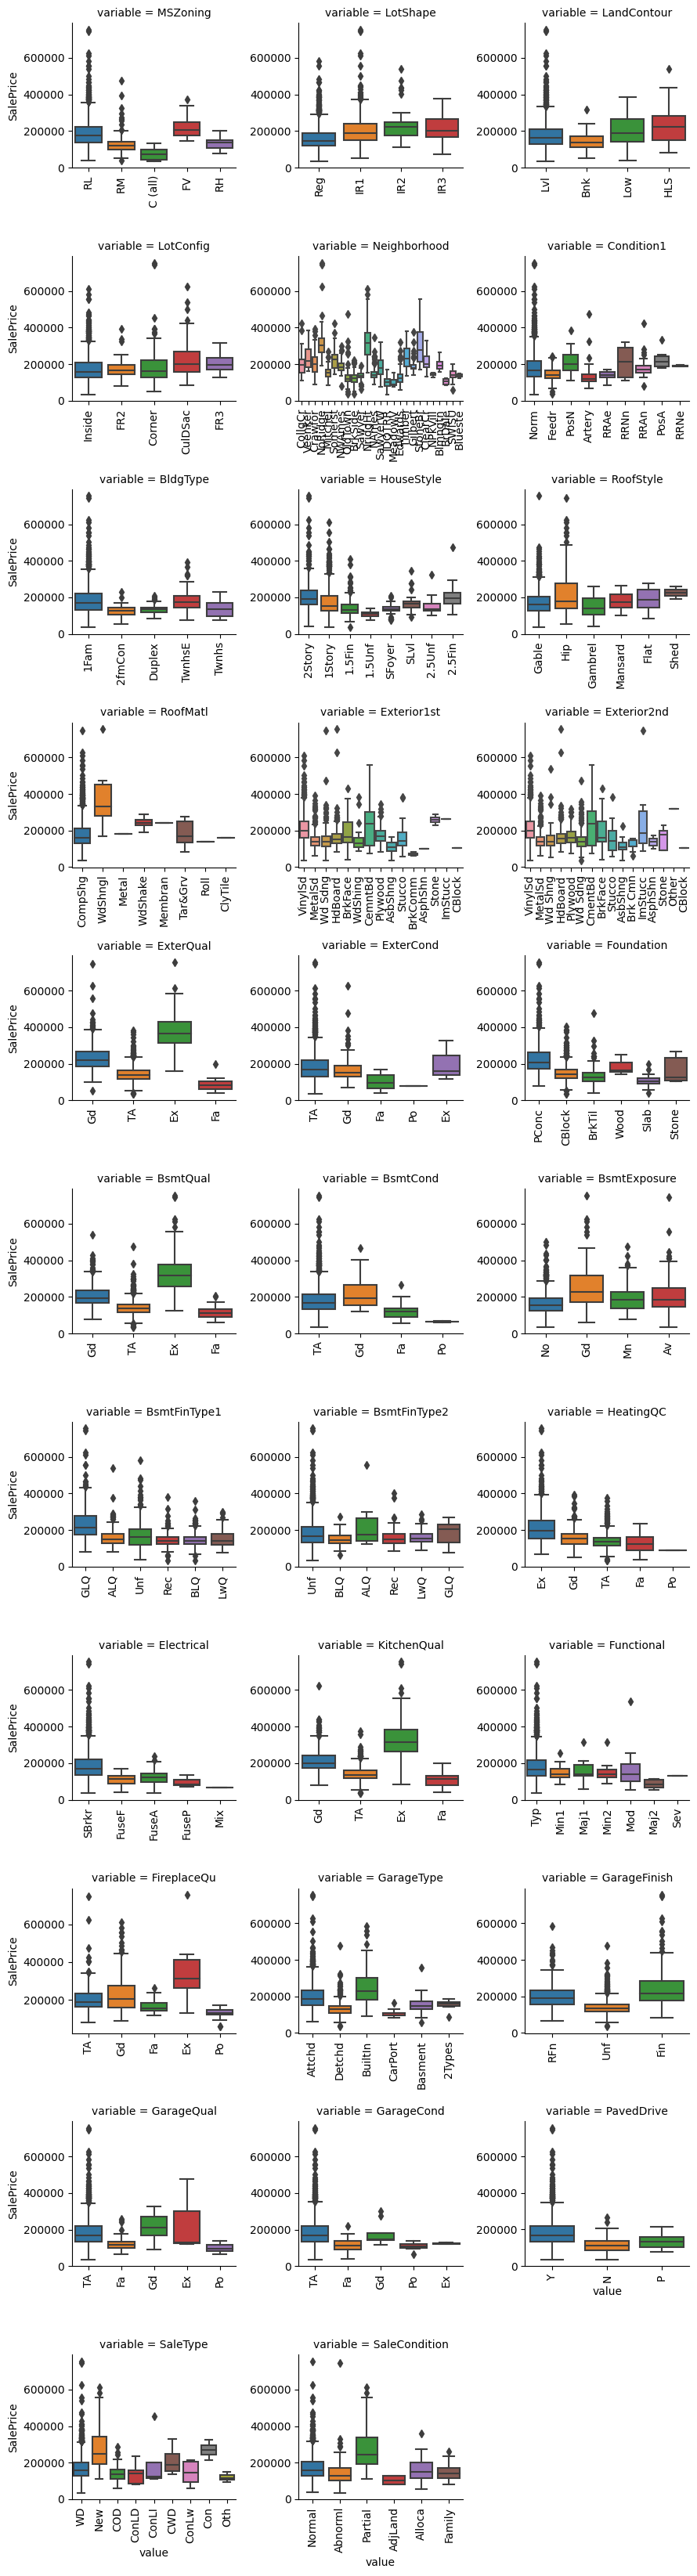

In [42]:

def boxplot(x,y,**kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
g.map(boxplot,'value','SalePrice')

## 2.5 Variables corrrelation


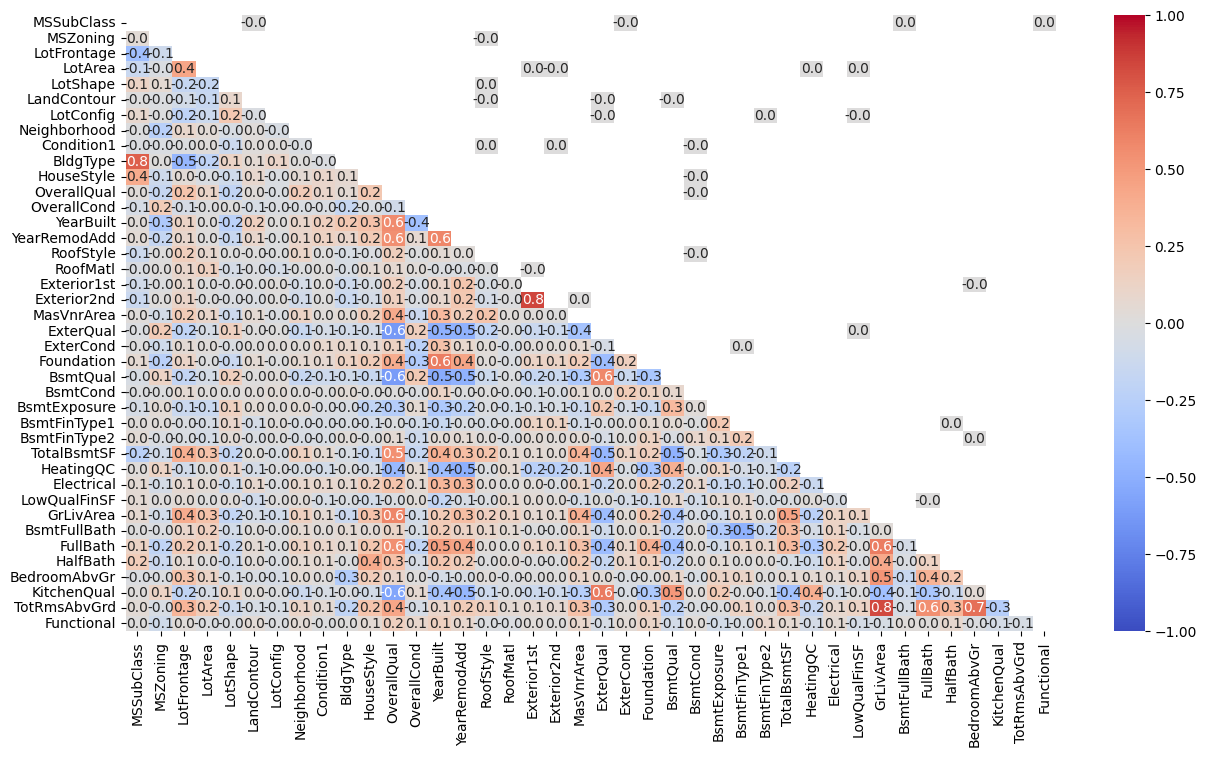

In [43]:
corr = df_train.iloc[:,:40].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

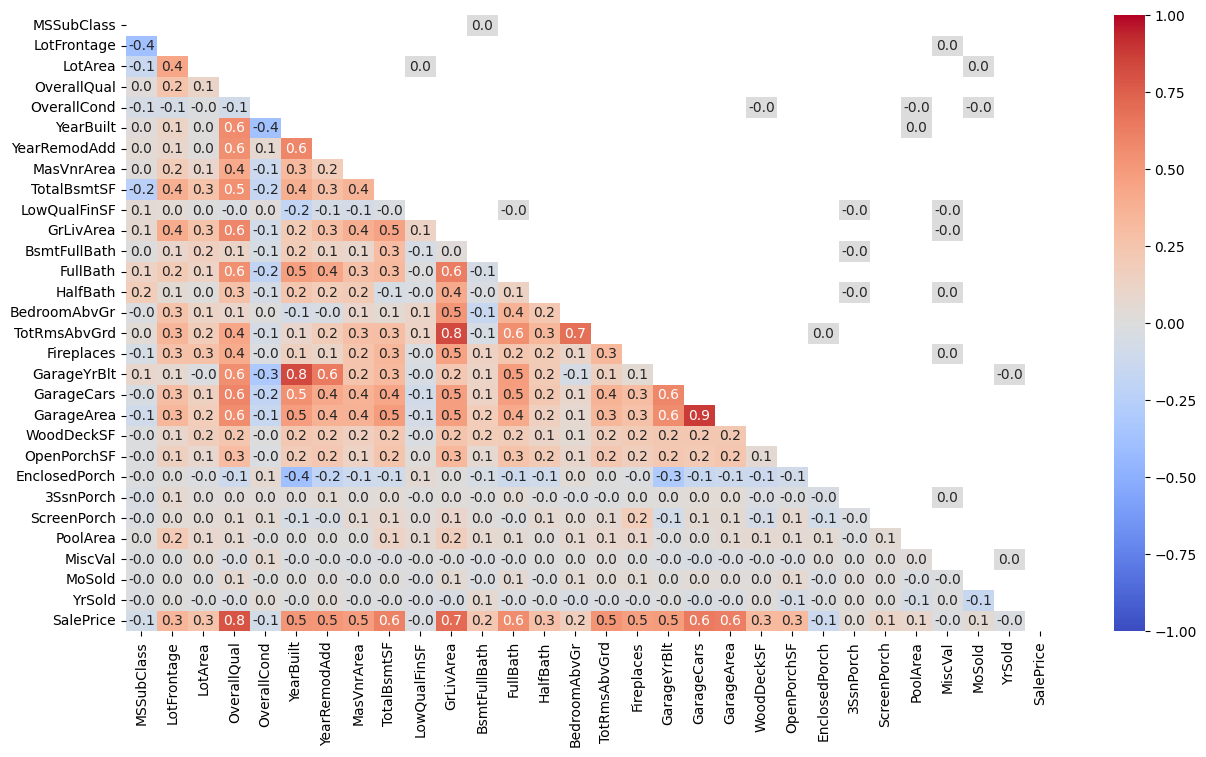

In [44]:
corr = df_train.loc[:, cols_not_categorial].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

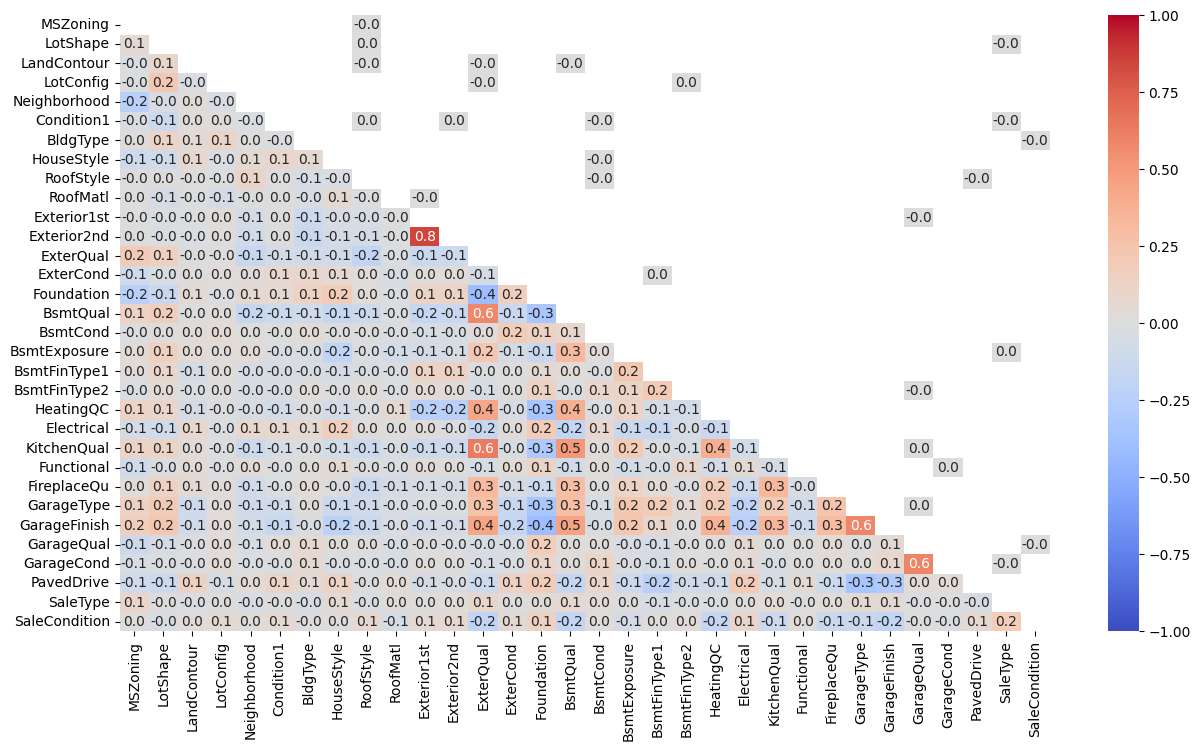

In [45]:
corr = df_train.loc[:, cols_categorial].corr().round(2)
mask = np.triu(corr)
plt.figure(figsize=(15, 8))
sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)
plt.show()

# 3 Models

- Evaluate the models with Grid Search CV
- Search the hyperparameter of the best model with grid search CV  

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


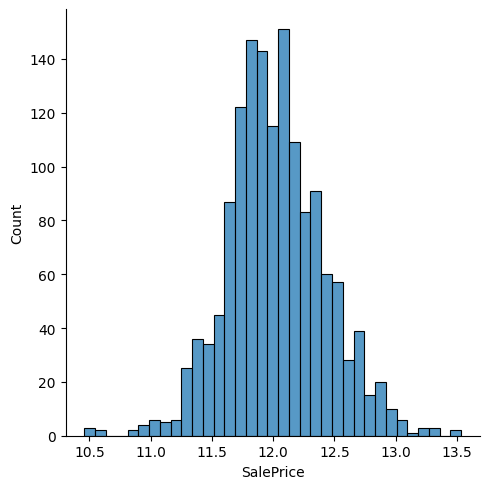

In [46]:
sns.displot(np.log1p(df_train.SalePrice))

In [47]:
df_train2 = df_train
df_train2 = df_train.fillna(0)
df_train2.isna().mean().sort_values(ascending = False)

MSSubClass      0.0
GarageArea      0.0
BsmtFullBath    0.0
FullBath        0.0
HalfBath        0.0
               ... 
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
TotalBsmtSF     0.0
SalePrice       0.0
Length: 62, dtype: float64

In [48]:

param_grid = {'scaled':[StandardScaler(),MinMaxScaler(),'passthrough'],
              'estimator':[LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(),DummyRegressor(),Ridge(), Lasso(), ExtraTreesRegressor(), AdaBoostRegressor(), BaggingRegressor()]}
param_grid

{'scaled': [StandardScaler(), MinMaxScaler(), 'passthrough'],
 'estimator': [LinearRegression(),
  RandomForestRegressor(),
  KNeighborsRegressor(),
  DummyRegressor(),
  Ridge(),
  Lasso(),
  ExtraTreesRegressor(),
  AdaBoostRegressor(),
  BaggingRegressor()]}

In [49]:
pipe = Pipeline([
                 ('scaled',StandardScaler()),
                 ('estimator',LinearRegression()),
                 ])

In [50]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=10,return_train_score=True ,n_jobs=-1, verbose=0, scoring='neg_root_mean_squared_error')

In [51]:
X = df_train2.iloc[:,:-1]
y = df_train2.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
X = X[cols_not_categorial[:-1]].apply(lambda x : np.log1p(x))

In [52]:
X.loc[:,:]
X = pd.concat([df_train2[cols_categorial],X], axis=1)

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaled', StandardScaler()),
                                       ('estimator', LinearRegression())]),
             n_jobs=-1,
             param_grid={'estimator': [LinearRegression(),
                                       RandomForestRegressor(),
                                       KNeighborsRegressor(), DummyRegressor(),
                                       Ridge(), Lasso(), ExtraTreesRegressor(),
                                       AdaBoostRegressor(),
                                       BaggingRegressor()],
                         'scaled': [StandardScaler(), MinMaxScaler(),
                                    'passthrough']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [54]:
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:30,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator,param_scaled,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
5,1.978137,0.051143,0.016018,0.000760,RandomForestRegressor(),passthrough,"{'estimator': RandomForestRegressor(), 'scaled...",-32469.501031,7284.187235,1,-12603.678734,261.217152
18,1.437711,0.024536,0.017213,0.001916,ExtraTreesRegressor(),StandardScaler(),"{'estimator': ExtraTreesRegressor(), 'scaled':...",-32476.480750,7467.873435,2,0.000000,0.000000
4,1.988414,0.047184,0.018284,0.004667,RandomForestRegressor(),MinMaxScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",-32506.947881,7006.177613,3,-12404.612752,517.478144
3,1.951514,0.026222,0.016815,0.000749,RandomForestRegressor(),StandardScaler(),"{'estimator': RandomForestRegressor(), 'scaled...",-32594.492862,7056.127605,4,-12570.600648,341.559009
19,1.411668,0.016098,0.017686,0.000670,ExtraTreesRegressor(),MinMaxScaler(),"{'estimator': ExtraTreesRegressor(), 'scaled':...",-32774.955929,7718.423730,5,0.000000,0.000000
20,1.494415,0.232501,0.018838,0.006964,ExtraTreesRegressor(),passthrough,"{'estimator': ExtraTreesRegressor(), 'scaled':...",-32870.973056,7909.935944,6,0.000000,0.000000
24,0.220485,0.004586,0.008357,0.000228,BaggingRegressor(),StandardScaler(),"{'estimator': BaggingRegressor(), 'scaled': St...",-33835.671651,6911.778332,7,-15267.185835,1747.327647
26,0.208749,0.007313,0.007127,0.001115,BaggingRegressor(),passthrough,"{'estimator': BaggingRegressor(), 'scaled': 'p...",-35550.325772,7438.351588,8,-14472.510008,1285.256004
21,0.469653,0.096260,0.020151,0.009888,AdaBoostRegressor(),StandardScaler(),"{'estimator': AdaBoostRegressor(), 'scaled': S...",-36437.383561,6248.478496,9,-26424.365968,608.658803
23,0.374208,0.007120,0.013865,0.000434,AdaBoostRegressor(),passthrough,"{'estimator': AdaBoostRegressor(), 'scaled': '...",-36543.173776,7186.312943,10,-26347.347803,840.781823


In [55]:
grid.best_params_

{'estimator': RandomForestRegressor(), 'scaled': 'passthrough'}

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [57]:

param_grid = {
              'estimator__n_estimators':[50,100,200],
              'estimator__max_depth':[10,20,30],
              'estimator__min_samples_split' : [2,5,10],
              'estimator__min_samples_leaf' : [1,5,10],
              }

param_grid

{'estimator__n_estimators': [50, 100, 200],
 'estimator__max_depth': [10, 20, 30],
 'estimator__min_samples_split': [2, 5, 10],
 'estimator__min_samples_leaf': [1, 5, 10]}

In [58]:
pipe = Pipeline([
                 ('estimator',RandomForestRegressor()),
                 ])
pipe

Pipeline(steps=[('estimator', RandomForestRegressor())])

In [59]:
grid = GridSearchCV(pipe,param_grid=param_grid, cv=5,return_train_score=True ,n_jobs=-1, scoring='neg_root_mean_squared_error')

In [60]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('estimator', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [10, 20, 30],
                         'estimator__min_samples_leaf': [1, 5, 10],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [61]:
# evaluate the score of several machine learning algorithm
grid_cv = pd.DataFrame(grid.cv_results_)

new_cols = [i for i in grid_cv.columns if 'split' not in i.lower()]

grid_cv.loc[:,new_cols].sort_values('mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__max_depth,param_estimator__min_samples_leaf,param_estimator__n_estimators,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
28,1.728451,0.011132,0.017002,0.000486,20,1,100,"{'estimator__max_depth': 20, 'estimator__min_s...",-30570.932118,4323.428884,1,-11256.368165,558.301805
64,1.089516,0.008818,0.014227,0.000573,30,5,100,"{'estimator__max_depth': 30, 'estimator__min_s...",-30599.981461,4742.204455,2,-20584.489924,1146.916824
29,3.444800,0.028643,0.028071,0.000628,20,1,200,"{'estimator__max_depth': 20, 'estimator__min_s...",-30686.635202,4607.769069,3,-11464.471159,733.030896
65,2.188702,0.006915,0.023838,0.000943,30,5,200,"{'estimator__max_depth': 30, 'estimator__min_s...",-30713.168477,4468.914631,4,-20464.442281,1112.794120
5,2.645299,0.025027,0.025543,0.000961,10,1,200,"{'estimator__max_depth': 10, 'estimator__min_s...",-30742.232557,4117.103640,5,-13459.306921,733.280722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,0.465345,0.002839,0.008940,0.000213,10,10,50,"{'estimator__max_depth': 10, 'estimator__min_s...",-32627.949630,4484.934712,77,-25976.848811,1070.028372
48,0.463683,0.001600,0.009036,0.000266,20,10,50,"{'estimator__max_depth': 20, 'estimator__min_s...",-32633.552101,4587.406127,78,-25763.385829,1276.495498
72,0.459409,0.005828,0.009293,0.000665,30,10,50,"{'estimator__max_depth': 30, 'estimator__min_s...",-32679.716985,4549.970882,79,-25856.156740,1105.581326
76,0.914611,0.013341,0.013204,0.000320,30,10,100,"{'estimator__max_depth': 30, 'estimator__min_s...",-32776.277606,4802.228244,80,-25815.420953,1185.956971


In [62]:
grid.best_params_

{'estimator__max_depth': 20,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__n_estimators': 100}

With the best parameters, we achieve an RMSE score close to 29000.

In [66]:
y = df_train2.SalePrice


def average_result(X,y):

    kfold = KFold(shuffle=True, n_splits=5)
    average_r2 = 0
    average_rmse = 0
    i_run_rmse = 0
    i_run= 0


    for train_idx, test_idx in kfold.split(X,y):

            X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

            std_scaled = MinMaxScaler().fit(X_train)
            X_train_scaled = std_scaled.transform(X_train)
            X_test_scaled = std_scaled.transform(X_test)
            rf_regressor_alg = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2)
            rf_regressor_alg.fit(X_train_scaled,y_train)
            y_pred = rf_regressor_alg.predict(X_test_scaled)
            i_run_rmse = sqrt(mean_squared_error(y_test,y_pred))
            i_run_r2 = r2_score(y_test,y_pred)
            average_r2 += i_run_r2
            average_rmse += i_run_rmse
            print(f"RMSE = {round(i_run_rmse,2)} - R2_score = {round(i_run_r2,2)} ")
        
    print(f"average R2 = {round(average_r2/kfold.get_n_splits(),2)} - average RMSE = {round(average_rmse/kfold.get_n_splits(),2)}")

    return rf_regressor_alg.feature_importances_

features_importances = average_result(X,y)

RMSE = 32448.65 - R2_score = 0.82 
RMSE = 34264.66 - R2_score = 0.82 
RMSE = 30093.35 - R2_score = 0.87 
RMSE = 29545.07 - R2_score = 0.87 
RMSE = 24113.01 - R2_score = 0.88 
average R2 = 0.85 - average RMSE = 30092.95


sum of the 15 best variables :  0.9096514390895004


<Axes: >

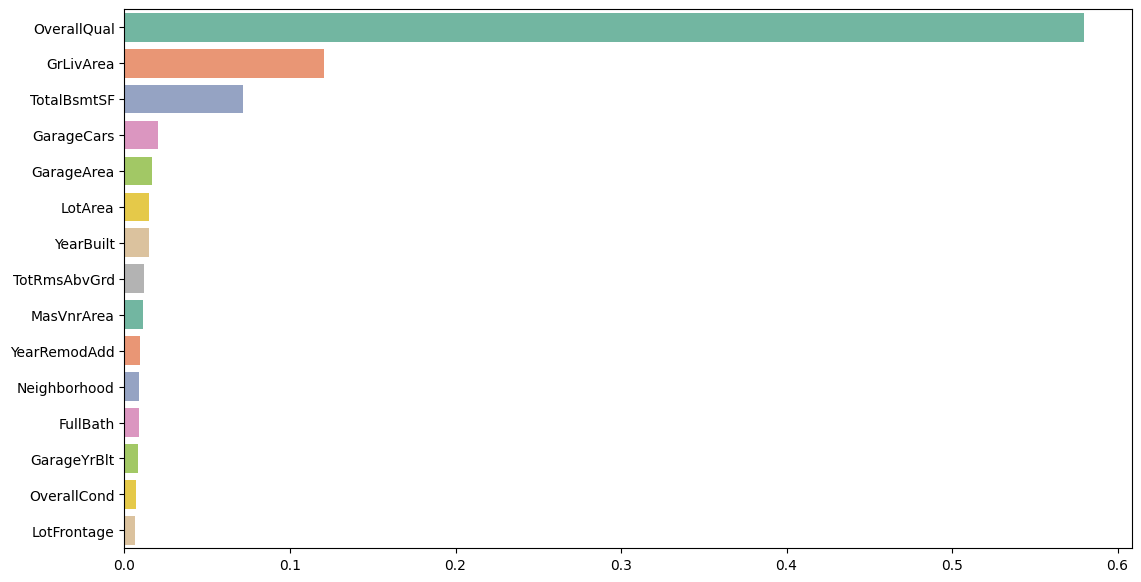

In [64]:
feat = features_importances.reshape(1,features_importances.shape[0])
df_features = pd.DataFrame(data=feat, columns=X.columns).T
df_feat = df_features[0].sort_values(ascending=False)
print('sum of the 15 best variables : ',df_feat[:15].sum())
df = {"feature_importances":df_feat[:15].index,"values":df_feat[:15].values}
cols_importances = df['feature_importances']
fig, ax = plt.subplots(figsize = (13,7))
sns.barplot(df, x= 'values',y =  'feature_importances', palette= sns.color_palette("Set2"))


- The top 10 variables that influences the random forest model score : OverallQual, GrLivArea, TotalBsmtSF, MAsVnrArea, FullBath, GarageCars, LotArea, GarageArea, YearBuilt, BsmtQual
- With 6 cross validation split the avegare of the RMSE is about 30000
